In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('Final_csv.csv')
df.head()

rating      country        date  \
0     1.0       Jordan  04-08-2024   
1     1.0  Switzerland  04-08-2024   
2     6.0      Germany  04-05-2024   
3     3.0        Italy  04-01-2024   
4     1.0        Spain  03-28-2024   

                                              review Type Of Traveller  \
0   Ryanair lost my luggage on a direct flight. I...          Business   
1    Booked Basel to Dublin 11.10 6.4.24. Baggage...    Family Leisure   
2     You get what you pay. Had overweight luggag...    Couple Leisure   
3    Very cheeky check-in system: this did not ha...    Couple Leisure   
4    Terrible customer service. Handling in Marra...    Family Leisure   

       Seat Type  Date Flown  Seat Comfort  Cabin Staff Service  \
0  Economy Class  April 2024           2.0                  1.0   
1  Economy Class  April 2024           1.0                  1.0   
2  Economy Class  April 2024           3.0                  3.0   
3  Economy Class  March 2024           1.0                  2.0   
4  Economy Class  March 2024           2.0                  4.0   

   Food & Beverages  ...  Airlines                      author  CODE2  CODE3  \
0               2.0  ...   ryanair               Alan Robinson     JO    JOR   
1               2.0  ...   ryanair                    T Maysan     CH    CHE   
2               3.0  ...   ryanair  55 reviews\n\n\n\nR Darnel     DE    DEU   
3               2.0  ...   ryanair                      Y Chen     IT    ITA   
4               2.0  ...   ryanair                 Diego Perez     ES    ESP   

    Latitude  Longitude Verified review_length  roberta_polarity  \
0  31.166705  36.941628        1           188         -0.716298   
1  46.798562   8.231974        1           441         -0.551128   
2  51.163818  10.447831        1            94         -0.353992   
3  42.638426  12.674297        0           108         -0.721132   
4  39.326068  -4.837979        0           594         -0.652707   

   roberta_sentiment  
0           Negative  
1           Negative  
2           Negative  
3           Negative  
4           Negative  

[5 rows x 24 columns]

In [7]:
grouped_data = df.groupby('country').size().reset_index(name='reviewers_count')

# Calculate mean latitude and longitude for each country
grouped_data = grouped_data.merge(df.groupby('country').agg({'Latitude': 'mean', 'Longitude': 'mean'}).reset_index(), on='country')

# Create scatter map plot with marker size based on the number of reviewers
fig = px.scatter_geo(grouped_data, lat='Latitude', lon='Longitude', hover_name='country',
                     size='reviewers_count', projection="natural earth", title="Reviewers by Country",
                     size_max=25)  # Adjust size_max as needed for appropriate marker size range

# Customize plot layout
fig.update_layout(geo=dict(showcountries=True))
fig.show()

In [8]:
import plotly.express as px



# Calculate the proportion of negative reviews for each country
df['negative_density'] = df.groupby('country')['roberta_sentiment'].transform(lambda x: (x == 'Negative').sum() / len(x))

# Create choropleth map
fig = px.choropleth(df, 
                    locations="CODE3", 
                    color="negative_density",
                    hover_name="country", 
                    hover_data=["negative_density"],
                    color_continuous_scale="Reds",  
                    title="Density of Negative Reviews by Country",
                    labels={'negative_density': 'Negative Reviews Density'},
                    projection='natural earth'  
                   )


fig.update_layout(coloraxis_colorbar=dict(title="Density"))


fig.update_geos(
    visible=True,  
)

# Customize layout
fig.update_layout(
    margin=dict(l=0, r=0, t=50, b=0), 
    coloraxis_colorbar_len=0.5,  
)

fig.show()

In [9]:
df['positive_density'] = df.groupby('country')['roberta_sentiment'].transform(lambda x: (x == 'Positive').sum() / len(x))

fig = px.choropleth(df, 
                    locations="CODE3", 
                    color="positive_density",
                    hover_name="country", 
                    hover_data=["positive_density"],
                    color_continuous_scale="Greens",  
                    title="Density of Positive Reviews by Country",
                    labels={'positive_density': 'Positive Reviews Density'},
                    projection='natural earth' 
                   )


fig.update_layout(coloraxis_colorbar=dict(title="Density"))

fig.update_geos(
    visible=True,  
)

fig.update_layout(
    margin=dict(l=0, r=0, t=50, b=0),  
    coloraxis_colorbar_len=0.5,  
)

fig.show()

In [10]:
df.tail()

rating         country        date  \
13141     9.0     Switzerland  08-05-2013   
13142     2.0  United Kingdom  08-05-2013   
13143     8.0          Greece  08-04-2013   
13144     2.0       Australia  08-01-2013   
13145     5.0     New Zealand  07-30-2013   

                                                  review Type Of Traveller  \
13141  Flew AUH-GVA A333. The Business class product ...      Solo Leisure   
13142  March 2013 MAN-AUH-DEL in Economy Class. While...      Solo Leisure   
13143  For some reason First Class is not always avai...      Solo Leisure   
13144  Very disappointing flight (DUB-AUH-SYD) recent...      Solo Leisure   
13145  Myself my Partner and 8 year old son have just...      Solo Leisure   

            Seat Type   Date Flown  Seat Comfort  Cabin Staff Service  \
13141  Business Class  August 2013           5.0                  4.0   
13142   Economy Class  August 2013           2.0                  2.0   
13143     First Class  August 2013           5.0                  5.0   
13144   Economy Class  August 2013           3.0                  1.0   
13145   Economy Class    July 2013           2.0                  4.0   

       Food & Beverages  ...  CODE2  CODE3   Latitude   Longitude Verified  \
13141               4.0  ...     CH    CHE  46.798562    8.231974        0   
13142               3.0  ...     GB    GBR  54.702354   -3.276575        0   
13143               5.0  ...     GR    GRC  38.995368   21.987713        0   
13144               2.0  ...     AU    AUS -24.776109  134.755000        0   
13145               4.0  ...     NZ    NZL -41.500083  172.834408        0   

      review_length roberta_polarity roberta_sentiment  negative_density  \
13141            54         0.691070          Positive          0.515789   
13142           189        -0.318521          Negative          0.563291   
13143           137        -0.551128          Negative          0.370968   
13144           116        -0.664037          Negative          0.558665   
13145           109         0.739783          Positive          0.505376   

       positive_density  
13141          0.410526  
13142          0.349910  
13143          0.516129  
13144          0.365985  
13145          0.408602  

[5 rows x 26 columns]

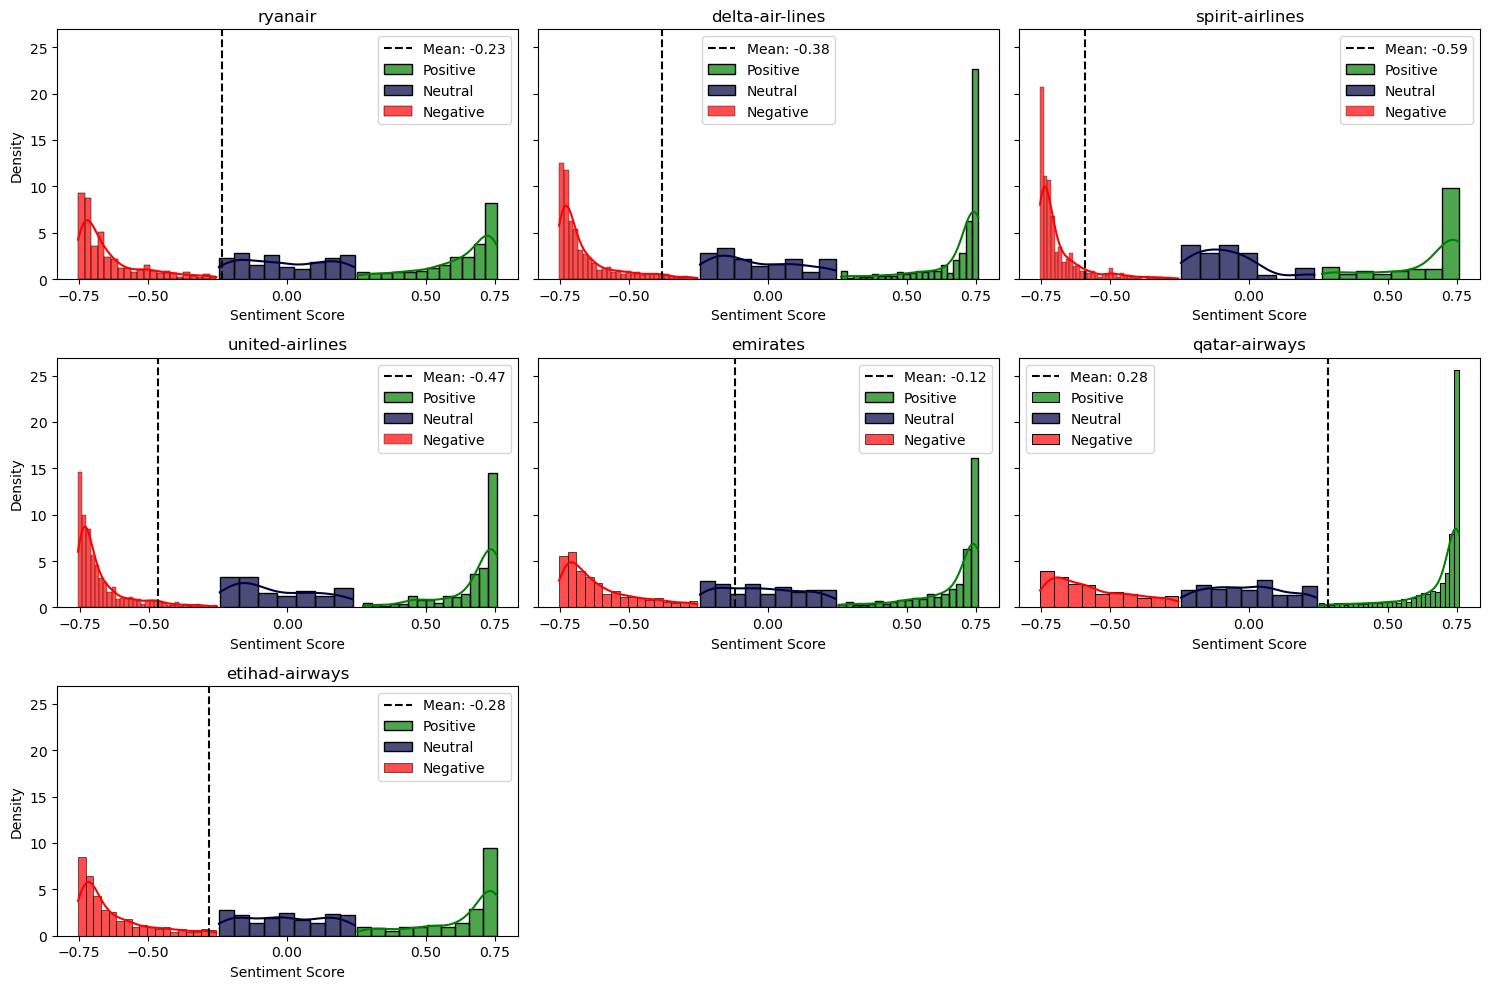

In [13]:
airlines = ['ryanair', 'delta-air-lines', 'spirit-airlines', 'united-airlines', 'emirates', 'qatar-airways', 'etihad-airways']

# Set up subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 10), sharey=True)

axs = axs.flatten()

# Iterate over each airline
for i, airline in enumerate(airlines):
    # Filter data for the current airline
    airline_data = df[df['Airlines'] == airline]
    
    # Separate sentiment scores into positive, negative, and neutral
    pos_sentiment = airline_data['roberta_polarity'][airline_data['roberta_polarity'] > 0.25]
    neg_sentiment = airline_data['roberta_polarity'][airline_data['roberta_polarity'] < -0.25]
    neu_sentiment = airline_data['roberta_polarity'][(airline_data['roberta_polarity'] >= -0.25) & (airline_data['roberta_polarity'] <= 0.25)]
    
    # Plot histogram of sentiment categories using Seaborn with density=True
    sns.histplot(pos_sentiment, color='green', alpha=0.7, label='Positive', ax=axs[i], kde=True, stat='density')
    sns.histplot(neu_sentiment, color='#000042', alpha=0.7, label='Neutral', ax=axs[i], kde=True, stat='density')
    sns.histplot(neg_sentiment, color='red', alpha=0.7, label='Negative', ax=axs[i], kde=True, stat='density')
    
    # Calculate mean sentiment score
    mean_score = np.mean(airline_data['roberta_polarity'])
    axs[i].axvline(x=mean_score, color='black', linestyle='--', label=f'Mean: {mean_score:.2f}')
    
  
    axs[i].set_title(airline)
    axs[i].set_xlabel('Sentiment Score')
    axs[i].set_ylabel('Density')
    axs[i].legend()
    axs[i].set_xticks([-0.75, -0.5, 0, 0.5, 0.75])


for j in range(len(airlines), len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()
